# 3.2 Classification and Regression


Problems that need a *quantitative* response (numeric value) are **regression**; problems that need a *qualitative* response (boolean or category) are **classification**. Many statistical methods can be applied to both types of problems.

**Binary** classification has two output classes. They usually end up being "A" and "not A". Examples are "earthquake" or "no earthquake=noise". **Multiclass** classification refers to one with more than two classes.

Classification here requires that we know the labels, it is a form of *supervised learning*.

## 1. Classification Algorithms
There are several classifier algorithms, which we will summarize below before practicing.

* **Logistic Regression**: The model uses the logistic function to squeeze the output of a linear equation between 0 and 1, which can then be interpreted as a probability. Logistic regression is mostly used for binary classification problems.

* **Linear Discriminant Analysis (LDA)**: The LDA optimiziation methods produces an optimal dimensionality reductions to a decision line for classificaiton. It is based on variance reduction and has analogy to a PCA coordinate system.

* **Naive Bayes (NB)**: Simple algorithm that requires little hyper-parameters, provides interpretable results. The algorithm computes conditional probabilities and uses the product as a decision rule to maximize the probability in each class.

* **K-nearest neighbors (KNN)**: Choose *K* as the numbers of nearest data points to consider. Gather each data sample and the K nearest ones, assign the class that is most represented in that group (the mode of the K labels).

* **Support Vector Machine (SVM)**: Finds the hyperplanes that separate the classes with sufficient margins. The hyperplanes can be linear and more complex (kernels SVM such as radial basis function and polynomial kernels). SVM was very popular for limited training data.

* **Random Forest (RF)**: Decision trees are common for prediction pipelines. *Decision tree learning* is a method to create a predictive model of trees based on the data. More on that this monday.

* **Artificial Neural Networks (ANN)**: Models inspired by biological neural networks capable of capturing complex patterns.

Some classifiers can handle multi class natively (Stochastic Gradient Descent - SGD; Random Forest classification;  Naive Bayes). Others are strictly binary classifiers (Logistic Regression, Support Vector Machine classifier - SVM). 


## Exercise
We will create a synthetic dataset representing three rock types: Granite, Basalt, and Sandstone. Each type will have characteristic values for density and magnetic susceptibility.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


Generate synthetic data

In [17]:

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples per class
n_samples = 100

# Generate features for Granite
granite_density = np.random.normal(2.9, 0.2, n_samples)
granite_susceptibility = np.random.normal(0.0001, 0.0001, n_samples)
granite_label = ['Granite'] * n_samples

# Generate features for Basalt
basalt_density = np.random.normal(3.2, 0.2, n_samples)
basalt_susceptibility = np.random.normal(0.001, 0.0005, n_samples)
basalt_label = ['Basalt'] * n_samples

# Generate features for Sandstone
sandstone_density = np.random.normal(2.4, 0.2, n_samples)
sandstone_susceptibility = np.random.normal(0.00005, 0.00005, n_samples)
sandstone_label = ['Sandstone'] * n_samples

# Combine data
density = np.concatenate([granite_density, basalt_density, sandstone_density])
susceptibility = np.concatenate([granite_susceptibility, basalt_susceptibility, sandstone_susceptibility])
labels = np.concatenate([granite_label, basalt_label, sandstone_label])

# Create DataFrame
data = pd.DataFrame({
    'Density': density,
    'Magnetic Susceptibility': susceptibility,
    'Lithology': labels
})
data.head()

,Density,Magnetic Susceptibility,Lithology
0,2.999343,-0.000042,Granite
1,2.872347,0.000058,Granite
2,3.029538,0.000066,Granite
3,3.204606,0.000020,Granite
4,2.853169,0.000084,Granite


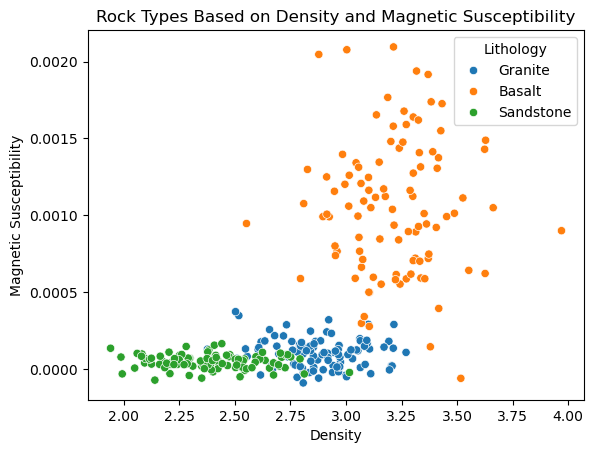

In [18]:
import seaborn as sns

sns.scatterplot(
    x='Density',
    y='Magnetic Susceptibility',
    hue='Lithology',
    data=data
)
plt.title('Rock Types Based on Density and Magnetic Susceptibility')
plt.show()

Split the data between training and testing

In [19]:
X = data[['Density', 'Magnetic Susceptibility']]
y = data['Lithology']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

Train a k-NN classifier on the training data.

In [20]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

Evaluate performance

In [21]:
y_pred = classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[22  6  0]
 [ 5 25  5]
 [ 1  2 24]]
              precision    recall  f1-score   support

      Basalt       0.79      0.79      0.79        28
     Granite       0.76      0.71      0.74        35
   Sandstone       0.83      0.89      0.86        27

    accuracy                           0.79        90
   macro avg       0.79      0.80      0.79        90
weighted avg       0.79      0.79      0.79        90




## 2. Regression Algorithms

Regressions are model that predict continuous numerical values based on inputs.

The applications in geosciences may include groundwater Level Prediction (REF), soil property estimation (REF), and Temperature and Precipitation Modeling (REF).

### 2.1 Linear Regression

Let $y$ be the data, and $\hat{y}$ be the predicted value of the data. A general linear regression can be formulated as

$\hat{y} = w_0 + w_1 x_1 + ... + w_n x_n = h_w (\mathbf{x})$.

$\mathbf{\hat{y}} = \mathbf{G} \mathbf{w}$.

$y$ is a data vector of length $m$, $\mathbf{x}$ is a feature vector of length $n$. $\mathbf{w}$ is a vector of model parameter, $h_w$ is referred to as the *hypothesis function* or the *model* using the model parameter $w$. In the most simple case of a linear regression with time, the formulation becomes:

$\hat{y} = w_0 + w_1 t$,

where $x_1 = t$ the time feature.

To evaluate how well the model performs, we will compute a *loss score*, or a *residual*. It is the result of applying a *loss* or *cost* or *objective* function to the prediction and the data. The most basic *cost function* is the **Mean Square Error (MSE)**:

$MSE(\mathbf{x},h_w) = \frac{1}{m} \sum_{i=1}^{m} \left( h_w(\mathbf{x})_i - y_i  \right)^2  = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}_i - y_i  \right)^2 $, in the case of a linear regression.

The *Normal Equation* is the solution to the linear regression that minimize the MSE.

$\mathbf{w} = \left( \mathbf{x}^T\mathbf{x} \right)^{-1} \mathbf{x}^T \mathbf{y}$

This compares with the classic inverse problem framed by $\mathbf{d} = \mathbf{G} \mathbf{m}$.

$\mathbf{m} = \left( \mathbf{G}^T\mathbf{G} \right)^{-1} \mathbf{G}^T \mathbf{d} $

It can be solved using Numpy linear algebra module. If $\left( \mathbf{x}^T\mathbf{x} \right) $ is singular and cannot be inverted, a lower rank matrix called the *pseudoinverse* can be calculated using singular value decomposition. We also used in a previous class the Scikit-learn function for ``sklearn.linear_model.LinearRegression``, which is the implementation of the *pseudoinverse*. We practice below how to use these standard inversions:


### Other common aslgorithms

* **Linear Regression**: Models linear relationships between variables.
* **Polynomial Regression**: Captures non-linear relationships by including polynomial terms.
* **Support Vector Regression (SVR)**: Extension of SVM for regression tasks.
* **Neural Networks**: Handle complex, non-linear relationships.
* **Random Forest Regression**:  an ensemble learning method used for regression tasks. It operates by constructing multiple decision trees during training and outputting the average prediction of the individual trees.


### Exercise
Objective: Predict soil moisture content based on environmental factors.

We will simulate soil moisture influenced by temperature and humidity.


In [23]:
# Number of samples
n_samples = 300

# Generate environmental variables
temperature = np.random.uniform(15, 35, n_samples)  # in degrees Celsius
humidity = np.random.uniform(30, 90, n_samples)      # in percentage

# Generate soil moisture as a function of temperature and humidity
soil_moisture = (
    0.5 * humidity - 0.3 * temperature + np.random.normal(0, 2, n_samples)
)

# Create DataFrame
data = pd.DataFrame({
    'Temperature': temperature,
    'Humidity': humidity,
    'Soil Moisture': soil_moisture
})
data.head()

,Temperature,Humidity,Soil Moisture
0,15.242415,39.946472,17.306785
1,19.824029,86.741889,37.997984
2,34.517475,80.998522,28.919144
3,31.030742,70.141340,26.484454
4,34.191533,57.737734,16.323955


Data visualization

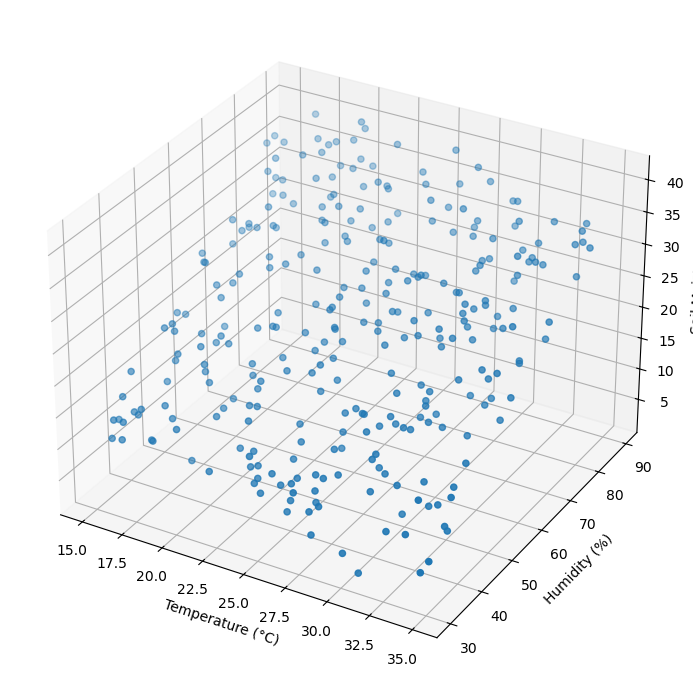

In [25]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['Temperature'], data['Humidity'], data['Soil Moisture'])
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Soil Moisture')
plt.tight_layout()
plt.show()

Split data between training and testing

In [26]:
X = data[['Temperature', 'Humidity']]
y = data['Soil Moisture']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


Choose model and train it. Always start with the simplest model: linear regression

In [27]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Evaluate model performance on test set using Mean Square Error (MSE) and R$^2$ score

In [29]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"mean square error {mse} and R2 {r2}")

mean square error 5.156947411293815 and R2 0.9232563663861366
